# ESS330-Karenia-brevis

Megan Hoover (Colorado State University)  
Lilly Zapalac (Colorado State University)  
Tessa (Colorado State University)

Load Libraries:

In [ ]:
#setup, include=FALSE
knitr::opts_chunk$set(echo = TRUE)
library(broom)
library(visdat)
library(tidyr)
library(tidyverse)
#> ── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
#> ✔ dplyr     1.1.4     ✔ purrr     1.0.4
#> ✔ forcats   1.0.0     ✔ readr     2.1.5
#> ✔ ggplot2   3.5.2     ✔ stringr   1.5.1
#> ✔ lubridate 1.9.4     ✔ tibble    3.2.1
#> ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
#> ✖ dplyr::filter() masks stats::filter()
#> ✖ dplyr::lag()    masks stats::lag()
#> ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
library(tidymodels)
#> ── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──
#> ✔ dials        1.4.0     ✔ rsample      1.3.0
#> ✔ infer        1.0.8     ✔ tune         1.3.0
#> ✔ modeldata    1.4.0     ✔ workflows    1.2.0
#> ✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
#> ✔ recipes      1.3.0     ✔ yardstick    1.3.2
#> ── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
#> ✖ scales::discard() masks purrr::discard()
#> ✖ dplyr::filter()   masks stats::filter()
#> ✖ recipes::fixed()  masks stringr::fixed()
#> ✖ dplyr::lag()      masks stats::lag()
#> ✖ yardstick::spec() masks readr::spec()
#> ✖ recipes::step()   masks stats::step()
library(lubridate)
library(outliers)
library(patchwork)
library(mgcv)
#> Loading required package: nlme
#> 
#> Attaching package: 'nlme'
#> 
#> The following object is masked from 'package:dplyr':
#> 
#>     collapse
#> 
#> This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.
library(tibble)
library(randomForest)
#> randomForest 4.7-1.2
#> Type rfNews() to see new features/changes/bug fixes.
#> 
#> Attaching package: 'randomForest'
#> 
#> The following object is masked from 'package:outliers':
#> 
#>     outlier
#> 
#> The following object is masked from 'package:dplyr':
#> 
#>     combine
#> 
#> The following object is masked from 'package:ggplot2':
#> 
#>     margin

## Karenia Brevis Harmful Algal Blooms

# Abstract

Harmful red tide events along the Florida coast have been occurring more frequently and are around for prolonged periods of time. Karenia Brevis is commonly known as the red tide, and is a type of dinoflagellate algae that is fed by various organic nutrients that occur in upwelling zones, optimal water conditions, and are very complex to predict. Here, we try to understand what conditions allow Karenia brevis to thrive and what may be causing the increased outbreaks. Using an observation dataset from Florida Fish and Wildlife Conservation, we looked at correlations between salinity (ppt), water temperature (°C), and cell counts (per L) using the linear regression model and GAM. Our graphs show that salinity and water temperature have a significant role in higher cell counts, the algae cells are higher in a salinity of 30-35 and a temperature of 22-30 °C \[see @ magaña_villareal_2006\]. Our model statistics revealed that predicting Karenia Brevis with just salinity and water temperature is not enough to make future predictions; other variables, such as nutrients, need to be accounted for. Cell counts have been increasing since the beginning of our dataset in 1954 and understanding why can help to make needed changes to decrease the amount of red tide events along the coast.

# Introduction

Karenia brevis, often causes red tide events along the Florida Gulf Coast. These red tides are highly toxic, causing around 100 tons of fish to die per day during an active bloom. In fish, they affect muscle functioning and can cause convulsions and respiratory failure. Humans can also develop respiratory issues if the harmful algae are inhaled via ocean spray. Eating contaminated shellfish can lead to neurotoxic shellfish poisoning \[see @ kirkpatrick2004\]. Red tide events impact more than the health of humans and marine organisms, but also the economy. It’s been shown to decrease sales for hire or charter operations as much as 61% \[see @ florida2021quantifying\], which leads to economic disparity in these coastal regions. Since Karenia brevis have negative impacts on different aspects of life, it’s important to understand what factors cause the harmful algae to bloom and persist.

Blooms can be seen on all sides of the Florida coast, however, the most prominent blooms occur in the area between Tampa Bay and Charlotte Harbor \[see @ weisberg_liu_lembke_hu_hubbard_garrett_2019a\]. The high concentration of Karenia brevis on the Central West coast of Florida motivated us to study this region. One research article mentioned that upwelling along this area creates favorable conditions, because it’s a requirement for transporting new cells from their initiation region offshore to their new area along the shore \[see @ weisberg_liu_lembke_hu_hubbard_garrett_2019a\]. This tends to be the Tampa Bay to Charlotte harbor regions because that’s the common destination for the pathway in upwelling \[see @ weisberg_liu_lembke_hu_hubbard_garrett_2019a\]. This allows for the nutrients in those areas to be the easiest to reach causing the Tampa Bay to Charlotte harbor to have the highest cases of red tide.

Karenia brevis use different nutrients around them to multiply. After Karenia brevis upwells onto the coastline of Florida, they can use organic matter and gain additional nutrients from terrestrial or oceanic sources \[see @ weisberg_liu_lembke_hu_hubbard_garrett_2019a\]. This shows that organic materials along coastlines are very beneficial for the growth of red tide. Nitrogen from manmade resources has also caused red tides events to be prolonged. In one instance, having reduced total nitrogen levels of at least 25% in the Caloosahatchee River could have reduced the duration of one event that lasted 178 days to half that time \[see @ Tomasko, David and Landau, Lenny and Suau, Stephen and Medina, Miles and Hecker, Jennifer\]. Red tide can survive in a wide range of temperatures; however their optimal temperature is between 22 and 28 °C \[ see @ @ ahn2023hot\]. The red tide’s ability to survive in diverse temperatures allows for blooms to be seen in different regions of Florida. The salinity of the water is also a prominent factor. It’s been shown that the greatest cell growth occurs in salinities between 30 to 35 ppt and at a water temperature of 20-25°C \[ see @ magaña_villareal_2006\]. Since Karenia brevis can only grow in certain temperatures and salinities, we hypothesized that salinity and water temperature can allow future predictions of algal blooms.

# Data Overview

The data we used to better understand the red tide causing blooms, was provided by NOAA \[see @ noaa_2014\]. The .csv file provided continuous data from sites in Florida, Texas, Mississippi, and Alabama. All the sites we used for this study were from Pinellas County, Fl to Lee County, Fl or from latitude and longitudes of 26.25’49 N, –82.08’50 W and 27.54’16 N, –82.51’40 W. We chose this region in Florida due to a higher number of recorded blooms in comparison to other areas. The list of variables in the data set were location columns that detailed the name of the water body that the Karenia Brevis were found in and which city they were found off. There were also columns for latitude, longitude, date, time of extraction, depth of water measures, ranking of algal cells per liter, salinity of the water in parts per trillion, water temperature in degrees Celsius, and the object id where the sites were tested at. Even though there were many variables, a lot of them had missing data.

# Methods

First, we reviewed the data and cleaned it to be usable. We read in the data to R Studio and then created a new data frame by filtering sites from latitude and longitudes of 26.25’49 N, –82.08’50 W and 27.54’16 N, –82.51’40 W. To test our hypothesis, we only needed a few of the columns; we selected relevant columns of State_Id, Description, Latitude, Longitude, Sample_Date, Sample_Depth, CellCount, Salinity, and Water_Temp. We also removed NA values from the whole data frame, to avoid inaccurate visuals and statistics. The data had many observations without any cell counts observed; because we wanted to view the relationship between the sites that had high counts, we filtered the cell count column to only show rows where the count was greater than 0.

After cleaning the data, we tested relationships using vis_cor, scatter plots, GAM, and Random Forest models. Using Vis_cor we made a visual pixel graph to show if there was any correlation between the variables. We created several scatter plots to see if there were any relationships between water temperature, salinity, cell count, and the date. The relationships in the graph were non-linear, but showed trends from dates listed in the data. We tested the data on a GAM model to see how good it was at predicting future cell counts. The GAM model used the day of the year (to check a seasonal trend), and cell count by interaction between salinity and water temperature to predict future trends. A Random Forest model was also tested to predict cell count from the salinity, water temperature, and day of the year.

# Results

The graphs showing the relationship between water temperature and salinity, to determine cell count, were non-linear. The salinity and red tide cell counts were consistent with the background information and had the highest cell counts between a salinity of 28 to 35 PPT. Although the relationship was non-linear, there was a trend of higher cell counts between those two parameters. The same trend followed for the scatterplot of water temperature affecting red tide cell counts; although a non-linear trend, there was an increase in cell counts in between the range of 22 to 28°C. The yearly Effects of red tide cell counts from 1954- 2021, revealed that the cell counts have increased over time. It was also confirmed in the Salinity and red tide cell counts over time scatterplot, where cell counts within the preferred salinity range were higher in more recent years than from the start of the data set in 1954. The GAM model confirmed the significance of water temperature and salinity as a predictor of cell counts, with a p-value of less than 2e-16 for both. Day of the year from 1 to 365 was also tested in the GAM model, to determine if the day of the year (also season) was a significant indicator of cell count, it had a significant p- value of less than .05. Although these all turned out to be significant in determining cell count, the r^2 value indicated that the model only explained 0.74% of the variance in cell count. This is quite low, meaning other factors not included in the model may influence cell count significantly. The model was only able to explain about 9% of the variability in cell count. Again, this is relatively low, suggesting a lot of unexplained variation. The Random Forest model was an even worse fit, with only .25% of the variation explained, using salinity, water temperature, and day of the year as predictors. Both models weren’t a good fit to use as a prediction, because there weren’t enough data variables to accurately describe the complexity of the Karenia Brevis blooms.

Load data:

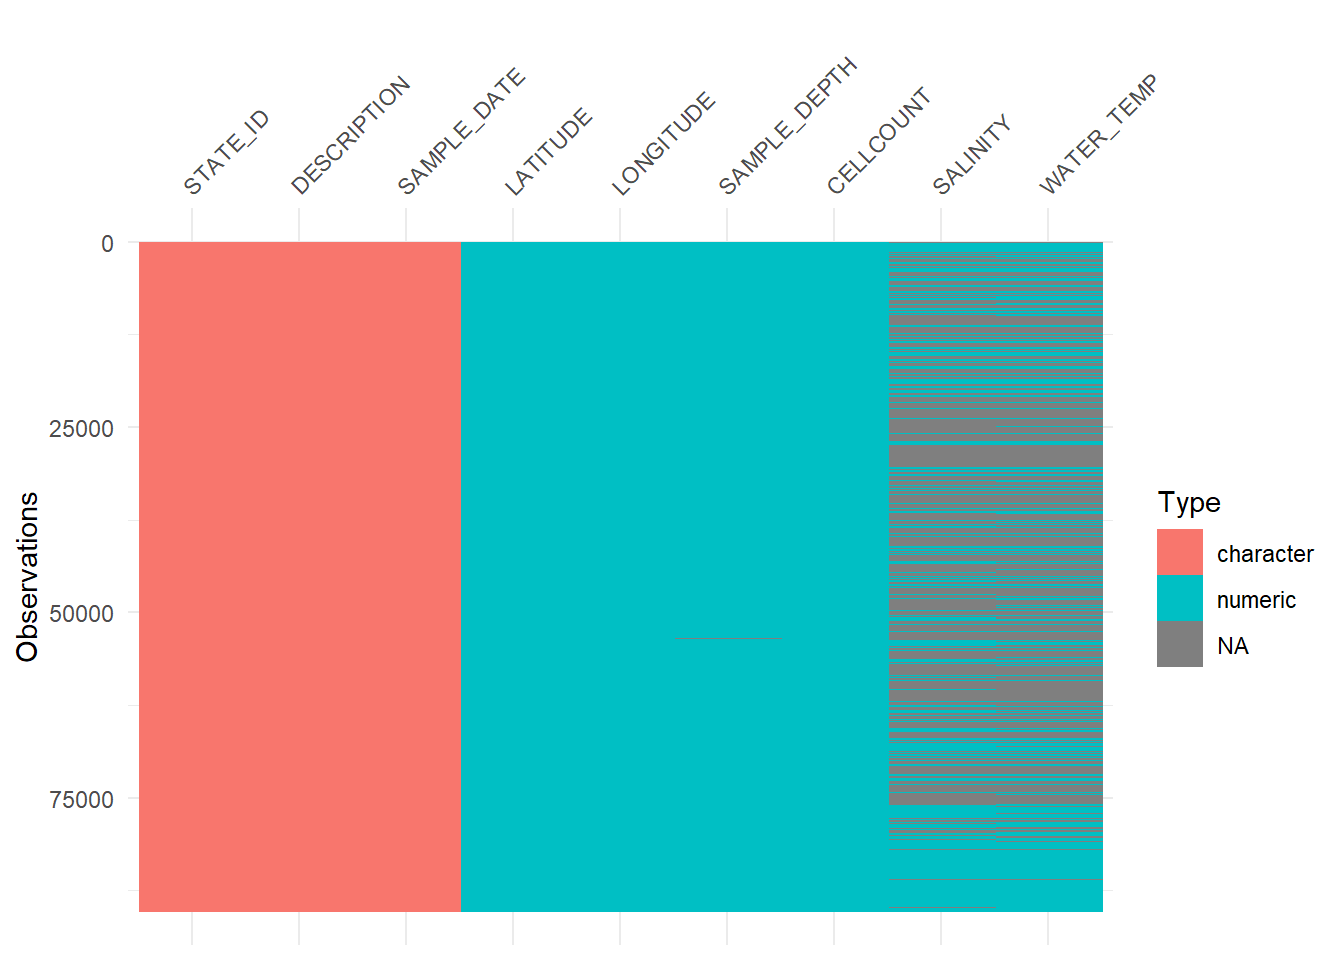

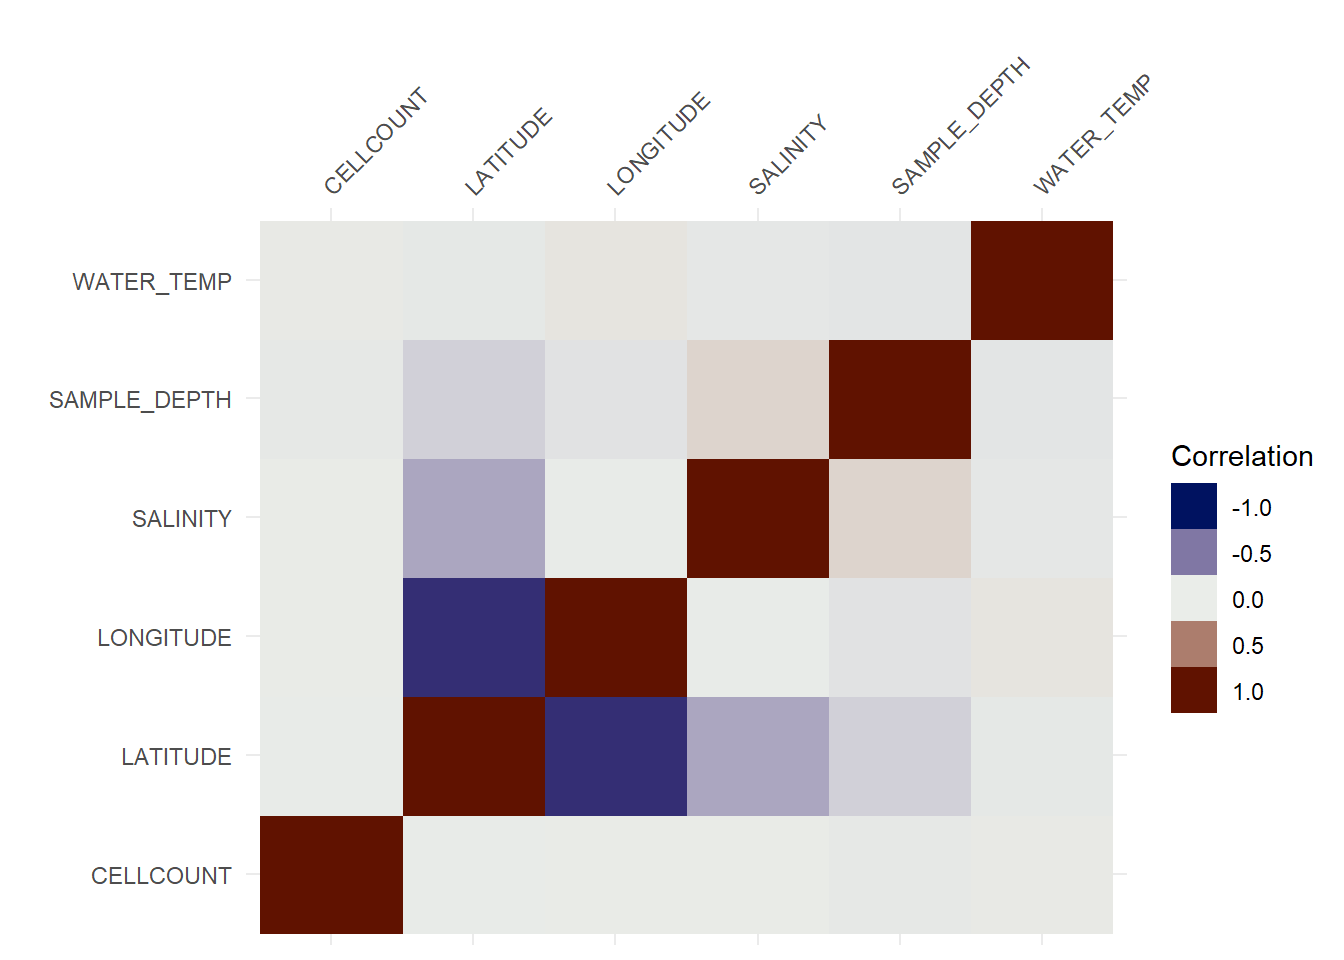

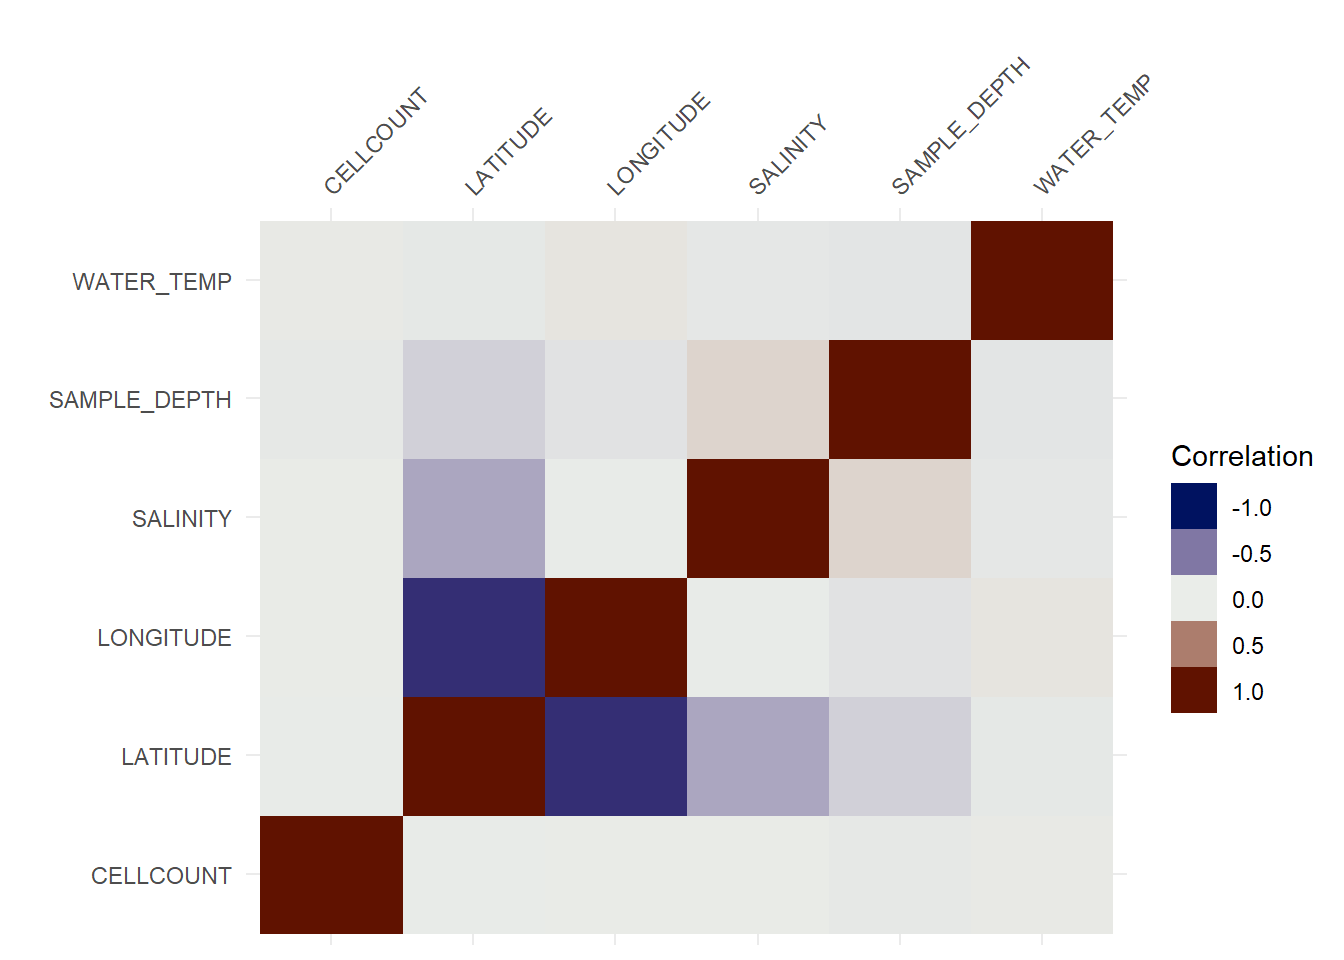

In [ ]:
karenia_brevis<-read_csv("C:/Users/samho/Desktop/ESS330/github/ESS330-results-discussion/habsos_20220225.csv")
#> Rows: 190339 Columns: 25
#> ── Column specification ────────────────────────────────────────────────────────
#> Delimiter: ","
#> chr (10): STATE_ID, DESCRIPTION, SAMPLE_DATE, GENUS, SPECIES, CATEGORY, CELL...
#> dbl (13): LATITUDE, LONGITUDE, SAMPLE_DEPTH, CELLCOUNT, CELLCOUNT_QA, SALINI...
#> lgl  (2): WIND_DIR, WIND_DIR_UNIT
#> 
#> ℹ Use `spec()` to retrieve the full column specification for this data.
#> ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#filter data to only include between 
# Filter the data frame directly in one step
filtered_karenia <- karenia_brevis%>%
  filter(LATITUDE >= 26.25 & LATITUDE<= 27.9044 & 
         LONGITUDE >= -82.8600 & LONGITUDE <= -82.1472)

#select columns we want
filtered_karenia <- filtered_karenia %>%
  select(
    STATE_ID,
    DESCRIPTION,
    LATITUDE,
    LONGITUDE,
    SAMPLE_DATE,
    SAMPLE_DEPTH,
    CELLCOUNT,
    SALINITY,
    WATER_TEMP,
  )


#show structure of dataset and na
vis<-vis_dat(filtered_karenia) 
print(vis)

Data Visualizations:

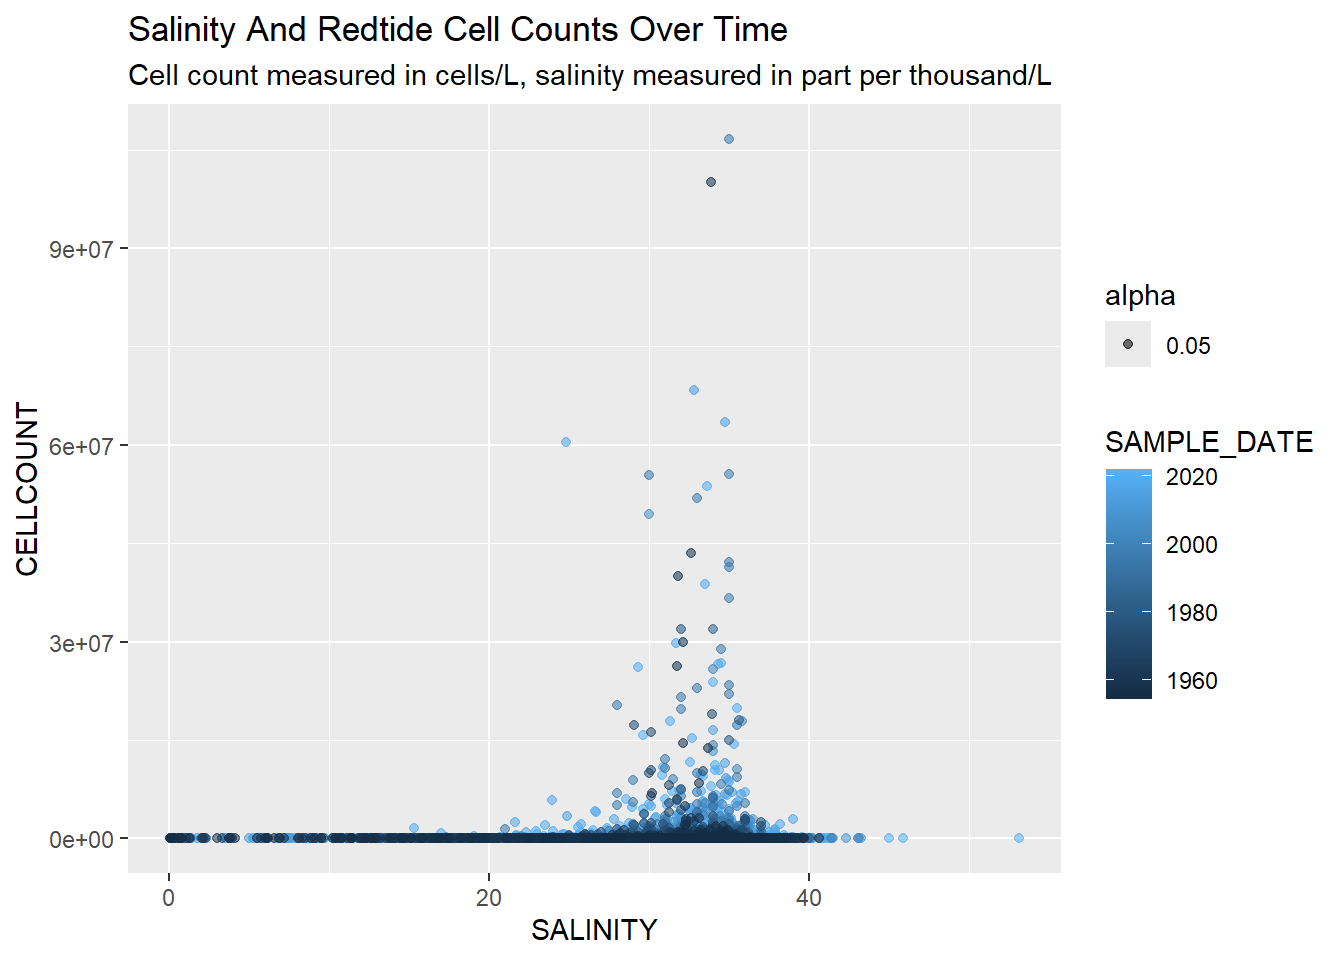

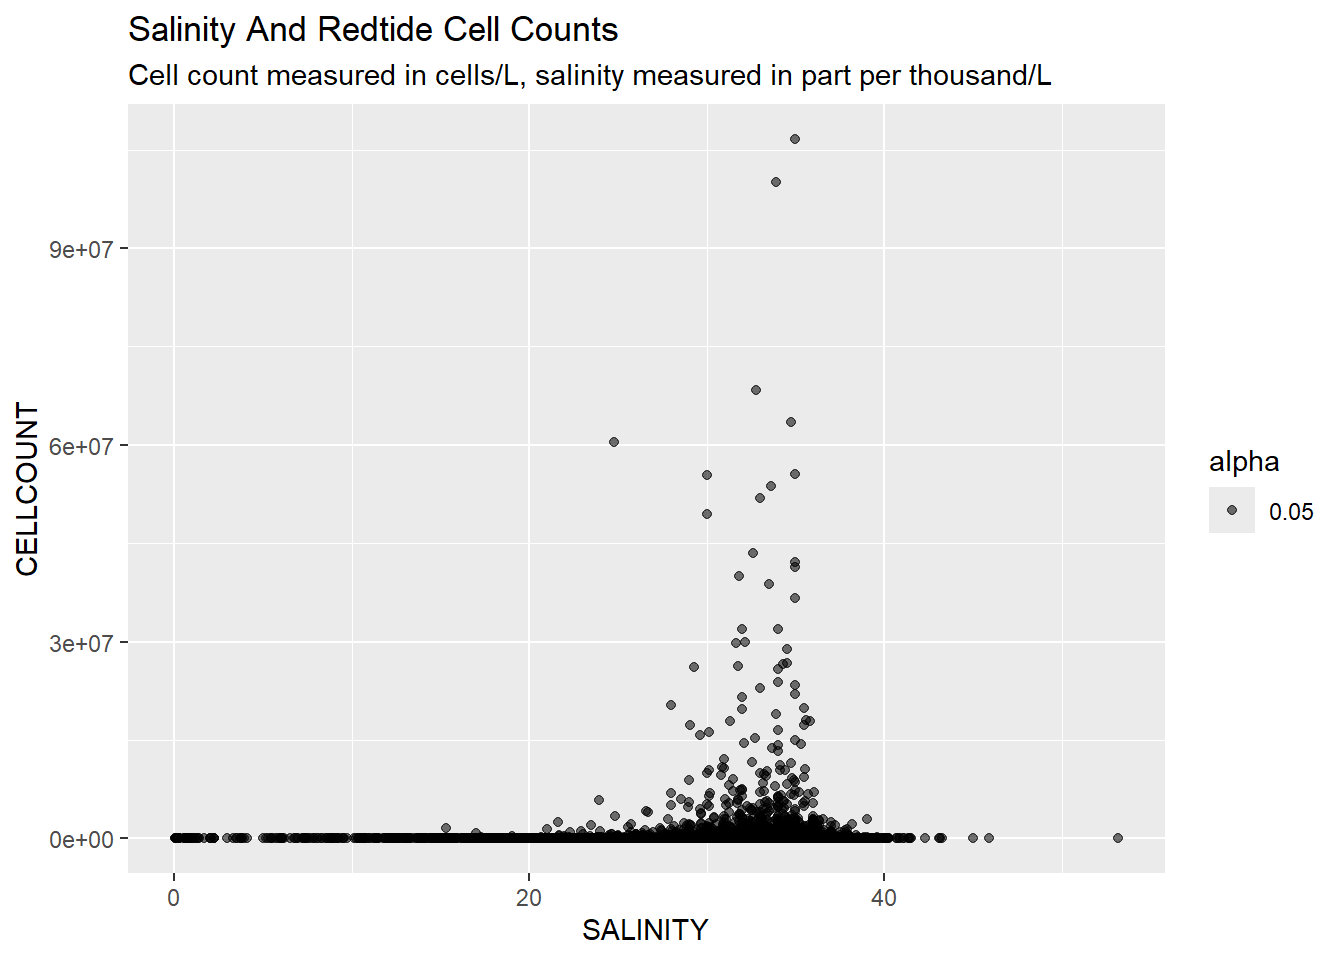

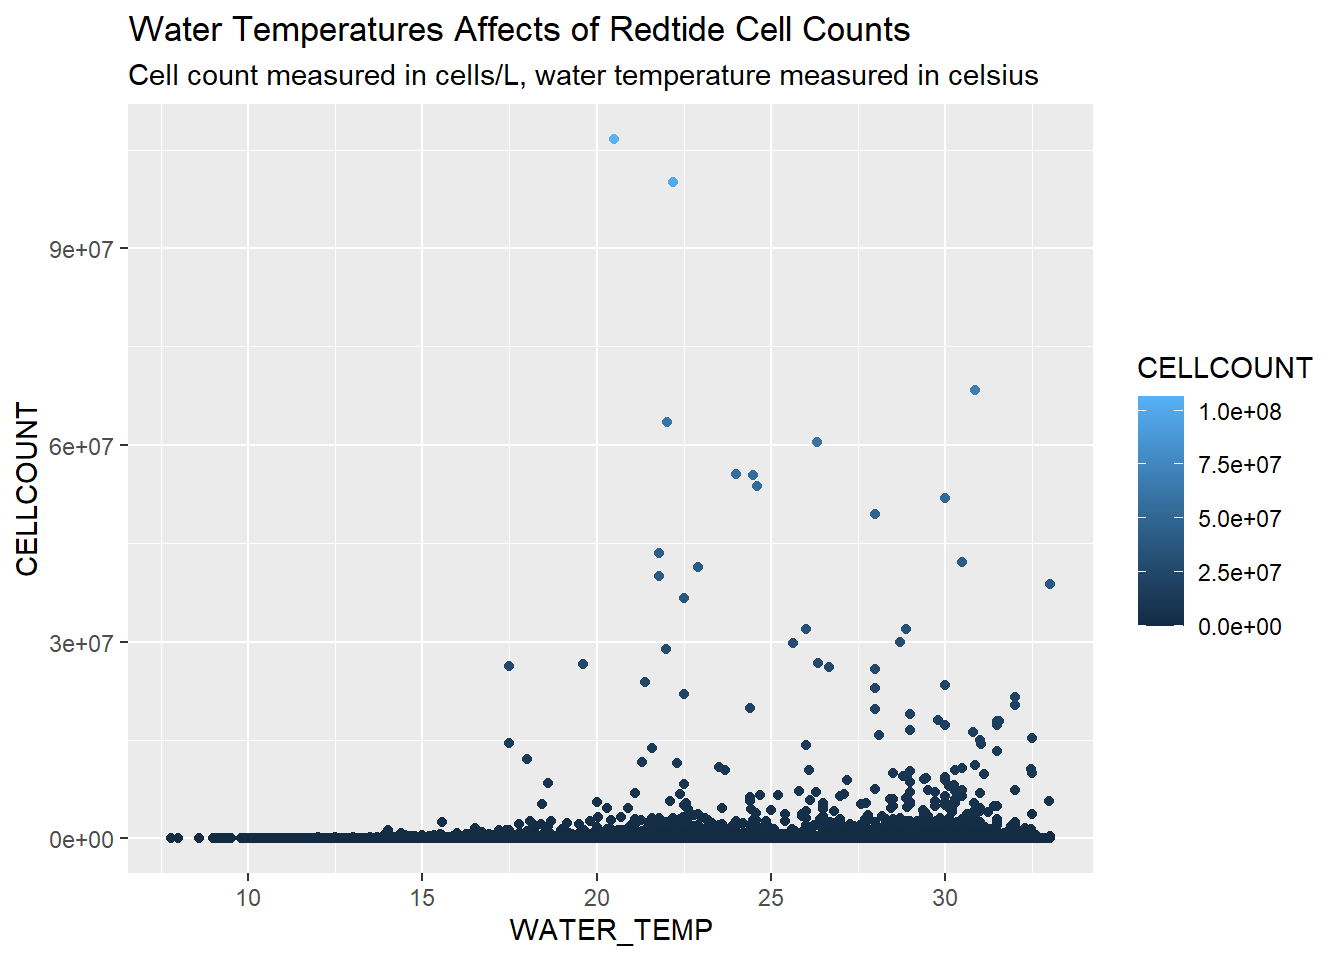

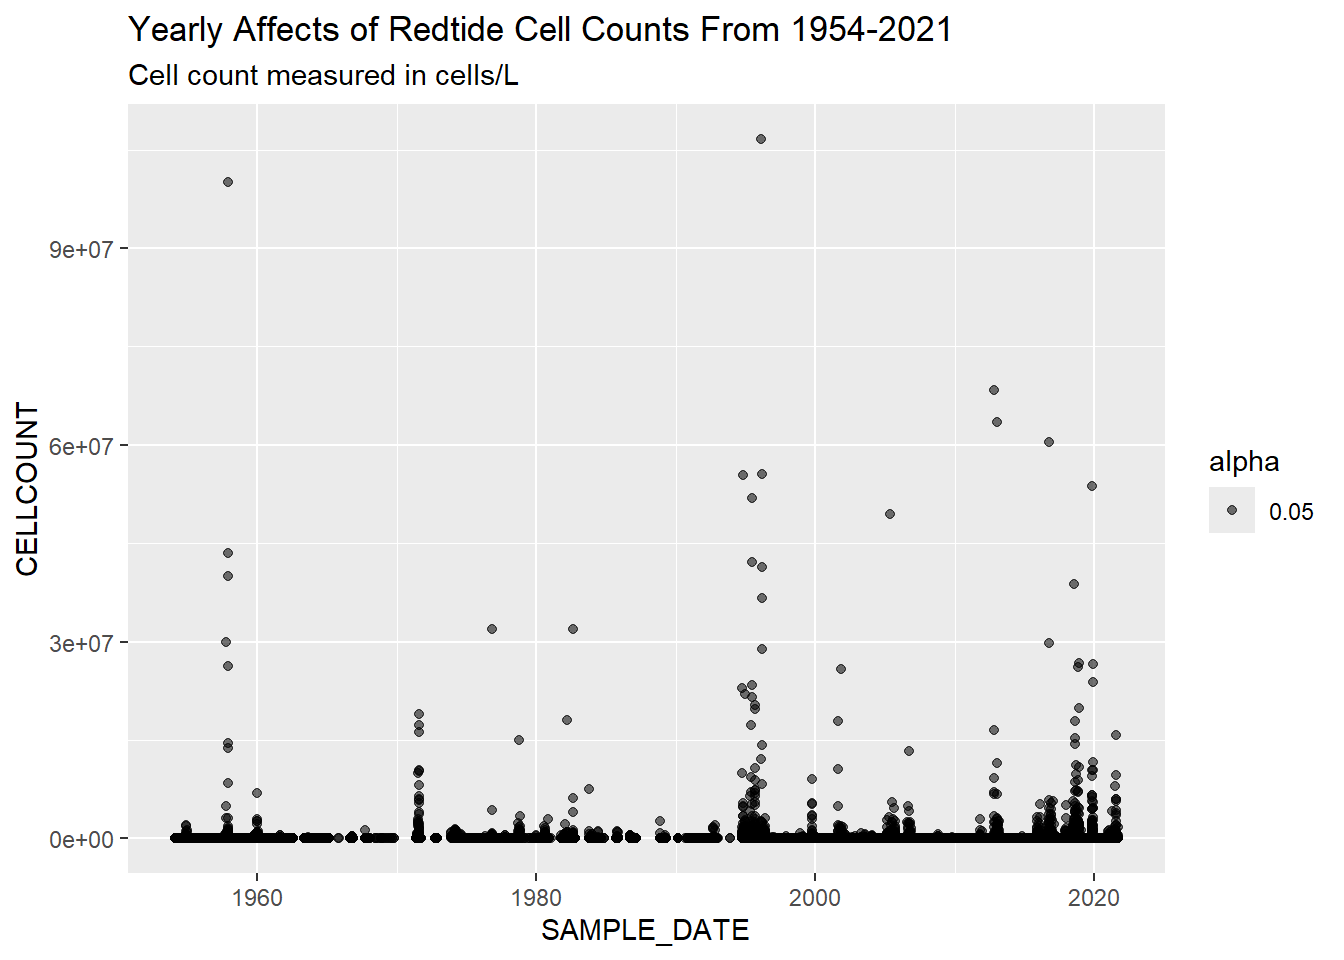

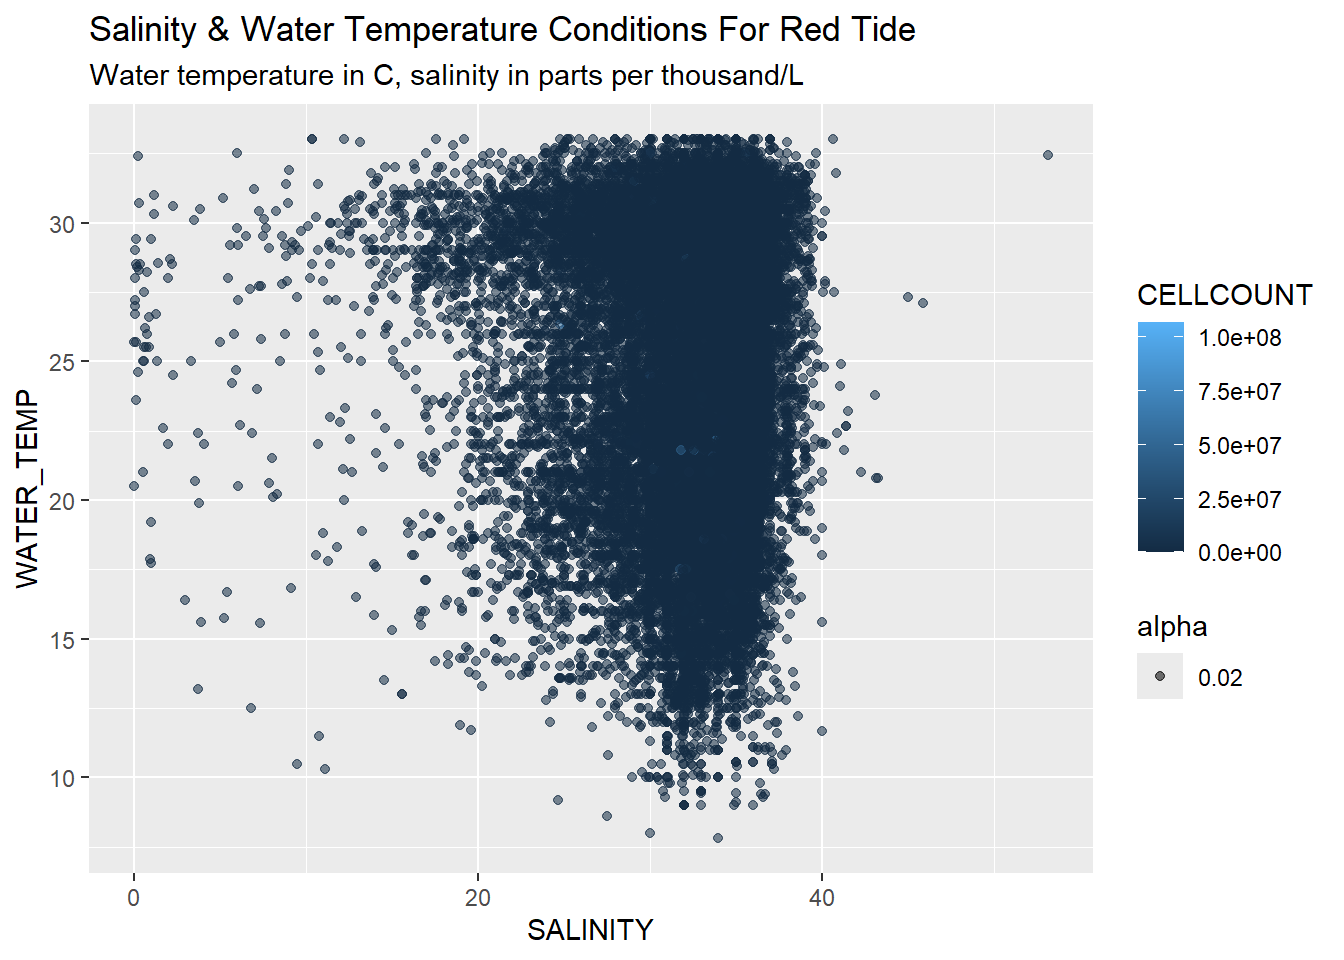

In [ ]:

#scatter plot of the cell counts and salinity with dates shown
cellcount_overtime<- filtered_karenia %>%
  ggplot(aes(x = SALINITY, y = CELLCOUNT, color= SAMPLE_DATE, alpha= .05)) +
  geom_point() +
  labs(title = "Salinity And Redtide Cell Counts Over Time",
subtitle = "Cell count measured in cells/L, salinity measured in part per thousand/L")

print(cellcount_overtime)

Statistical Test: GAM Model

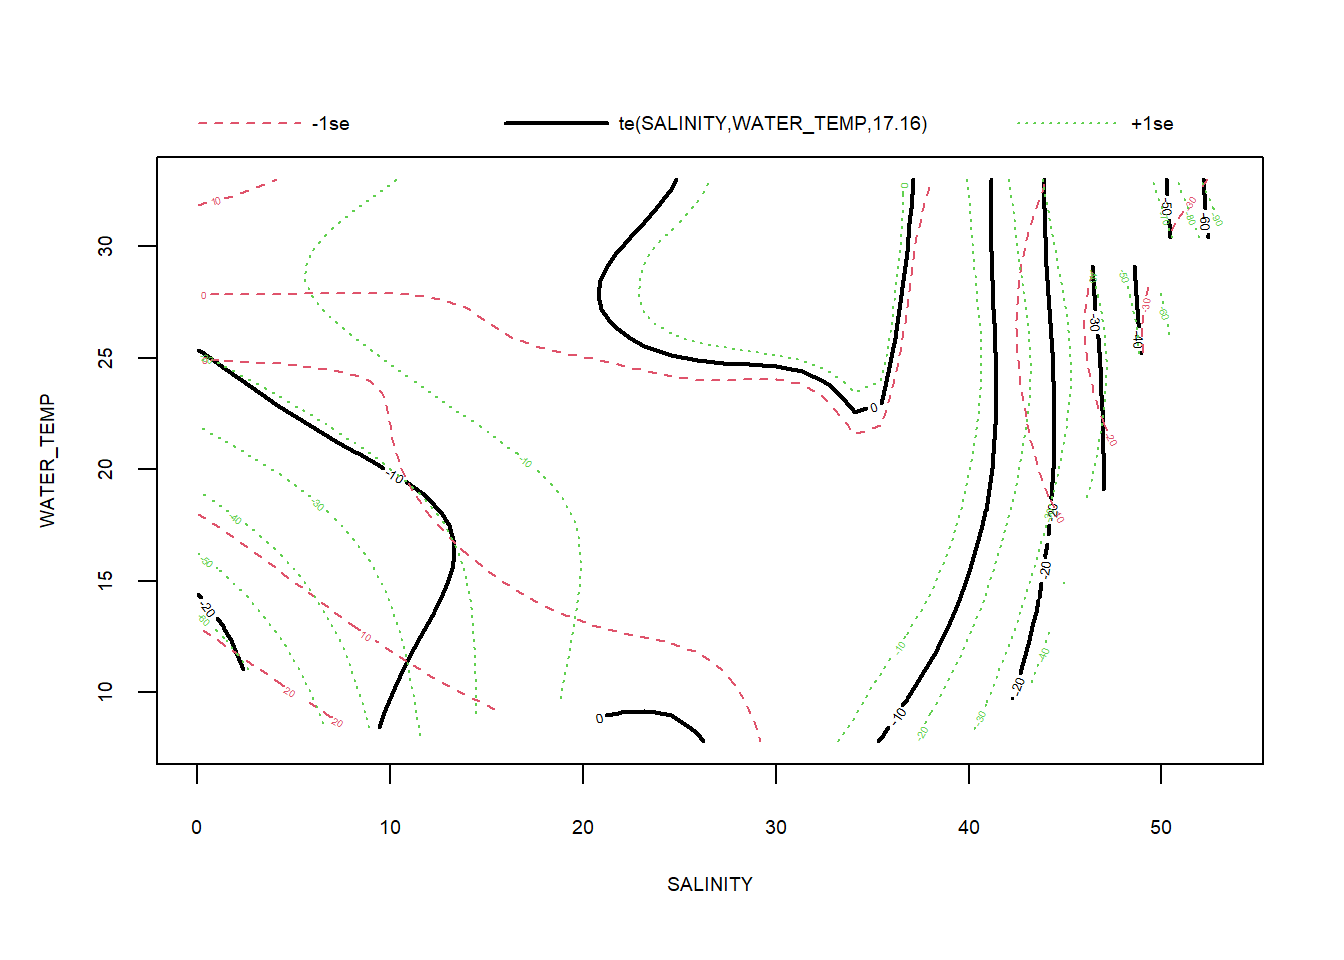

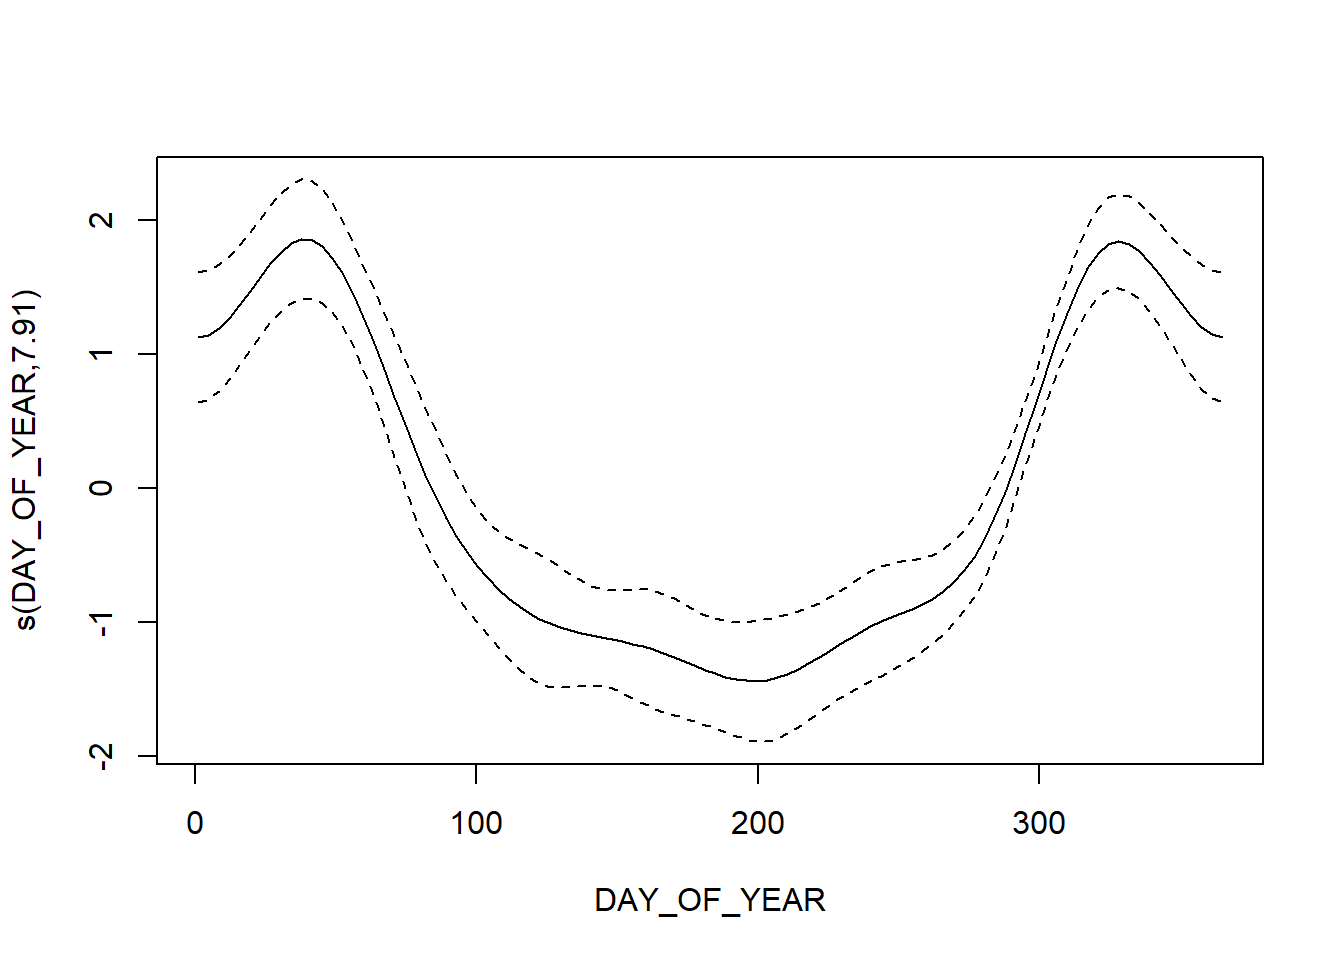

In [ ]:

#Convert SAMPLE_DATE to numeric day of year (1–365) for seasonal trend
filtered_karenia_days <- filtered_karenia1 %>%
  mutate(DAY_OF_YEAR = yday(SAMPLE_DATE))

#Fit the GAM model using DAY_OF_YEAR with bs = "cc":
#Fit GAM with interaction between salinity and water temp
gam_model <- gam(CELLCOUNT ~ 
                   te(SALINITY, WATER_TEMP) +  # interaction term
                   s(DAY_OF_YEAR, bs = "cc"),  # cyclic seasonal effect
                 family = quasipoisson(link = "log"),  # use for overdispersed count data
                 data = filtered_karenia_days,
                 method = "REML")

# Fit a GAM model with non-linear smooths for SALINITY and WATER_TEMP
# and a time effect to account for seasonal or time-based trends
summary(gam_model)
#> 
#> Family: quasipoisson 
#> Link function: log 
#> 
#> Formula:
#> CELLCOUNT ~ te(SALINITY, WATER_TEMP) + s(DAY_OF_YEAR, bs = "cc")
#> 
#> Parametric coefficients:
#>             Estimate Std. Error t value Pr(>|t|)    
#> (Intercept) 11.04302    0.09782   112.9   <2e-16 ***
#> ---
#> Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
#> 
#> Approximate significance of smooth terms:
#>                            edf Ref.df      F p-value    
#> te(SALINITY,WATER_TEMP) 17.163  17.96  9.464  <2e-16 ***
#> s(DAY_OF_YEAR)           7.913   8.00 19.537  <2e-16 ***
#> ---
#> Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
#> 
#> R-sq.(adj) =  0.00385   Deviance explained = 10.2%
#> -REML = 2.4687e+05  Scale est. = 8.9229e+06  n = 33854

filtered_karenia2<- filtered_karenia1 %>%
  mutate(SAMPLE_DATE = dmy_hms(SAMPLE_DATE),  # adjust to your format if needed
         DAY_OF_YEAR = yday(SAMPLE_DATE))
#> Warning: There was 1 warning in `mutate()`.
#> ℹ In argument: `SAMPLE_DATE = dmy_hms(SAMPLE_DATE)`.
#> Caused by warning:
#> ! All formats failed to parse. No formats found.

# 2. Fit GAM with interaction between salinity and water temp
gam_model <- gam(CELLCOUNT ~ 
                   te(SALINITY, WATER_TEMP) +  # interaction term
                   s(DAY_OF_YEAR, bs = "cc"),  # cyclic seasonal effect
                 family = quasipoisson(link = "log"),  # use for overdispersed count data
                 data = filtered_karenia_days,
                 method = "REML")

summary(gam_model)
#> 
#> Family: quasipoisson 
#> Link function: log 
#> 
#> Formula:
#> CELLCOUNT ~ te(SALINITY, WATER_TEMP) + s(DAY_OF_YEAR, bs = "cc")
#> 
#> Parametric coefficients:
#>             Estimate Std. Error t value Pr(>|t|)    
#> (Intercept) 11.04302    0.09782   112.9   <2e-16 ***
#> ---
#> Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
#> 
#> Approximate significance of smooth terms:
#>                            edf Ref.df      F p-value    
#> te(SALINITY,WATER_TEMP) 17.163  17.96  9.464  <2e-16 ***
#> s(DAY_OF_YEAR)           7.913   8.00 19.537  <2e-16 ***
#> ---
#> Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
#> 
#> R-sq.(adj) =  0.00385   Deviance explained = 10.2%
#> -REML = 2.4687e+05  Scale est. = 8.9229e+06  n = 33854
plot(gam_model)

Statistical test: Random Forest

In [ ]:
#Now, let's fit the Random Forest model to predict CELLCOUNT from the other variables.
# Fit a random forest model to predict CELLCOUNT
rf_model <- randomForest(CELLCOUNT ~ SALINITY + WATER_TEMP + DAY_OF_YEAR, 
                         data = filtered_karenia_days, 
                         importance = TRUE, 
                         ntree = 500)  # ntree is the number of trees

# Print the model summary
print(rf_model)
#> 
#> Call:
#>  randomForest(formula = CELLCOUNT ~ SALINITY + WATER_TEMP + DAY_OF_YEAR,      data = filtered_karenia_days, importance = TRUE, ntree = 500) 
#>                Type of random forest: regression
#>                      Number of trees: 500
#> No. of variables tried at each split: 1
#> 
#>           Mean of squared residuals: 2.367566e+12
#>                     % Var explained: -0.3

# Conclusion

Based on the scatterplot, Yearly Effects of Redtide cell counts from 1954- 2021, it can be interpreted that climate change has been one of the causes of the red tide cell to count to increase. This might be attributed to global warming, which has caused the water temperature to increase. Since Karenia brevis optimally grows in warmer water, warming of the oceans is highly beneficial for their survival. However, there would need to be further research into this idea since these increasing trends could be attributed to another variable including runoff from agriculture. Both “Water Temperatures Effects of Red Tide Cell Counts” and “Salinity And Red Tide Cell Counts” plots followed the known temperature and salinity trends that cause higher Karenia brevis cell counts, with the optimal temperature of 22-28°C (@ahn_glibert_heil_2023) and salinity of 30-35 ppt (@magaña_villareal_2006). The interaction between salinity and water temperature have a significant impact on the cell count, showing that these variables are important for the growth of the red tide. This interaction was presented in “Salinity & Water Temperature Conditions For Red Tide” correlates with the researched optimal of 30-35 ppt when the water temperature is 20-25°C respectively (@magaña_villareal_2006), proving that these variables work together in providing the best habitat for Karenia brevis.

Our r^2 and standard deviance was low showing that there is more information needed to predict cell count. This leads to the biological understanding of how minimal one variable has on the existence of this algae and instead is highly reliant on several variables being in their optimal range. Past research has indicated that “most of the remote sensing-based detection techniques of HABs were restricted to three parameters or less and these limited number of parameters do not fully constrain ecosystem model parameters” (@Karki, S., et.al., (2018)), which is what our limitation of understanding of red tide is attributed to.

Due to Florida consistently seeing red tide blooms it is important to have technology and enough data that will help predict these blooms, so people can prepare. This type of technology is difficult to use due to the lack of consistent data. We struggled with this in our study, because some sites had inconsistent sample dates with other sites. Prediction technology requires continuous satellite imagery and water samples. The barriers to this have led professionals to only a 90% accuracy of same day prediction, 65% accuracy for one day prediction, 72% accuracy for two-day prediction, and 71% accuracy for three-day prediction \[see @karki_sultan_elkadiri_elbayoumi_2018\]. This explains why our prediction models were not very accurate and as to why there was missing data in our data set. This is both an environmental and social problem for Florida since there is not enough data and accurate prediction models that warn the citizens of the area.

Since prediction is a difficult process, it would be best to be proactive in preventing the blooms from occurring before they start. This can be seen with inorganic nutrients since they aren’t favored by Karenia brevis, instead they’re favored by “faster-growing phytoplankton (e.g. diatoms) over dinoflagellates”, causing Karenia brevis to be outcompeted \[ see @weisberg_liu_lembke_hu_hubbard_garrett_2019a\]. Therefore, inorganic nutrients are less favorable to Karenia brevis. Decreasing the amount of nitrogen runoff in water sources and organic materials such as leaf cutting can help to decrease the longevity of the algal blooms.

One option to combat red tides was recently discussed, and involved having future scenarios aimed at prevention, mitigation, and control funded. Individuals in the area would vote to decide which scenarios would be the best for the community \[ see @lucas_larkin_adams_2019\]. This is a good option and would decrease the prevalence of these blooms. Although, it would be best for funding to be given to organizations that can provide consistent data that would help predict the red tide blooms. Since, red tides are a natural part of the Florida coastal ecosystem these blooms will never fully go away, therefore, having more funding on predictions will allow for the citizens and businesses of these communities to have some preparation so the economy and their health won’t suffer as much. Knowing that nutrient pollution also encourages these blooms, having restrictions put in place and studies about land use pollution could help prevent blooms from consistently developing. Lastly, we propose a skimming filter that would skim the top 5 feet of water when the water temperature and salinity are optimal. This would allow for potential karenia brevis to be removed from the water and therefore, would not be able to grow into a toxic bloom. This filter can then be cleaned with “an algicidal exudate IRI-160AA \[which\] was reported to reach 97% algacidal activity on K. brevis”, this algaecide is potentially good for removing Karenia brevis at the early stages \[ see @hu2022treatment\].